In [2]:
import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Download and extract the dataset


C:\Users\saira\AppData\Local\Temp\ipykernel_20444\3433601630.py:12: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [ ]:

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()




# Load the housing dataset


In [ ]:

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()



# Select the relevant features for clustering (longitude, latitude, median_income)


In [ ]:

housing_clustering = housing[['longitude', 'latitude', 'median_income']]


In [6]:

# Check for missing values
if housing_clustering.isnull().sum().any():
    housing_clustering = housing_clustering.dropna()


In [7]:

# Standardize the data
scaler = StandardScaler()
housing_clustering_scaled = scaler.fit_transform(housing_clustering)



# Function to find the optimal number of clusters using Silhouette Score


In [ ]:

def find_optimal_clusters(data):
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data)
        score = silhouette_score(data, clusters)
        print(f"Silhouette Score for k={k}: {score}")


In [9]:

# Finding the optimal number of clusters
find_optimal_clusters(housing_clustering_scaled)


Silhouette Score for k=2: 0.5482304452184799
Silhouette Score for k=3: 0.5179721838532693
Silhouette Score for k=4: 0.43517979770599646
Silhouette Score for k=5: 0.4100830999013529
Silhouette Score for k=6: 0.3984653534071962
Silhouette Score for k=7: 0.37225184832846725
Silhouette Score for k=8: 0.3666693541000338
Silhouette Score for k=9: 0.34617328321860785
Silhouette Score for k=10: 0.35372734784052684


In [10]:

# Fit K-Means model with the optimal k (let's assume k=4 based on silhouette score)

kmeans = KMeans(n_clusters=4, random_state=42)
housing_clustering['cluster'] = kmeans.fit_predict(housing_clustering_scaled)


C:\Users\saira\AppData\Local\Temp\ipykernel_20444\581652829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_clustering['cluster'] = kmeans.fit_predict(housing_clustering_scaled)


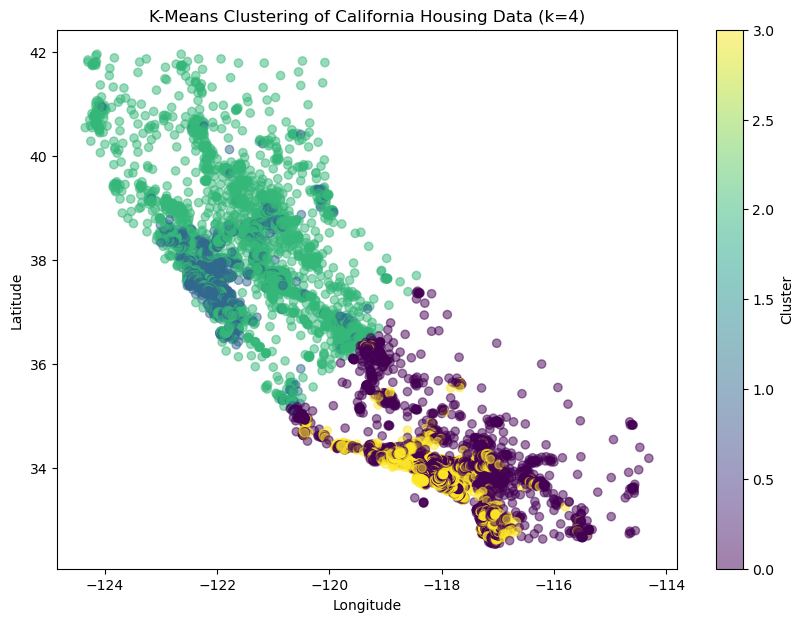

In [11]:

# Visualize the clusters with scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(housing['longitude'], housing['latitude'], c=housing_clustering['cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of California Housing Data (k=4)')
plt.colorbar(label='Cluster')
plt.show()



# Box plot to visualize the distribution of median income in each cluster


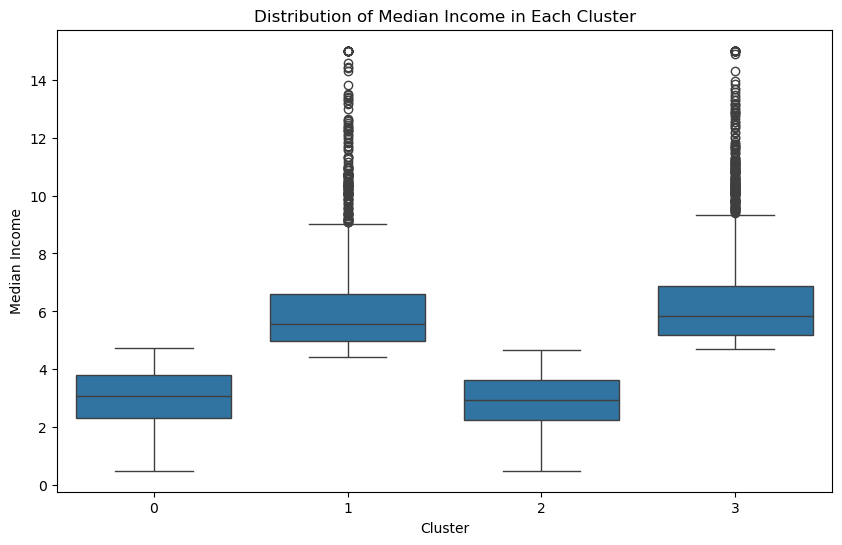

In [14]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='median_income', data=housing_clustering)
plt.title('Distribution of Median Income in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Income')
plt.show()


## Attached with the map

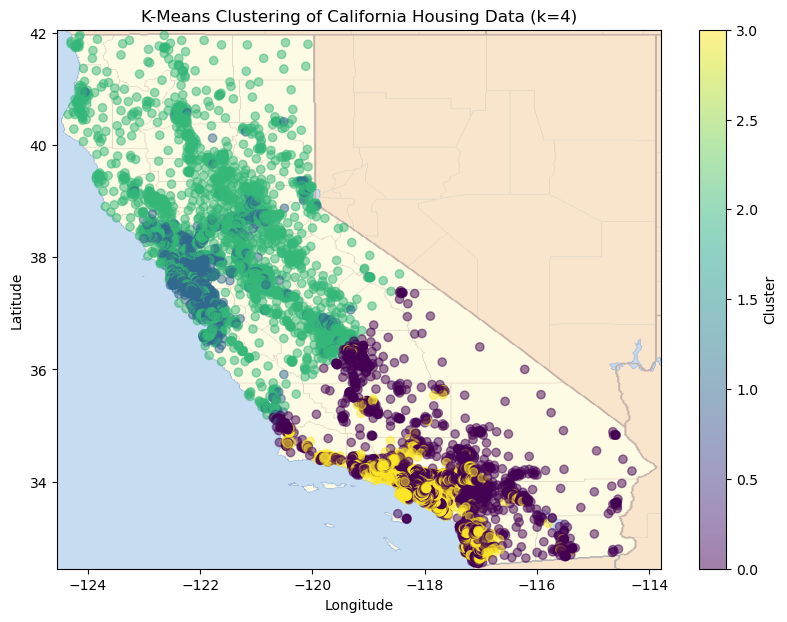

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the project root directory and image path
PROJECT_ROOT_DIR = os.getcwd()
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
california_map = os.path.join(images_path, "california.png")

# Load the California map image
california_img = mpimg.imread(california_map)

# Visualize the clusters with scatter plot overlaid on the map
plt.figure(figsize=(10, 7))

# Plot the map in the background
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.6)  # Adjust extents to match California's bounds

# Scatter plot of housing data with clusters
plt.scatter(housing['longitude'], housing['latitude'], c=housing_clustering['cluster'], cmap='viridis', marker='o', alpha=0.5)

# Labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of California Housing Data (k=4)')
plt.colorbar(label='Cluster')

# Show the plot
plt.show()
